In [1]:
import sys, os
PATH = os.path.dirname(os.path.abspath(os.curdir))
if PATH not in sys.path:
    sys.path.insert(0, PATH)

import numpy as np
import scipy as sp
import torch
import h5py

import src.Optimizer as opt
import src.simulation_setup as setup

from loky import get_reusable_executor
import matplotlib.pyplot as plt

In [2]:

# Define Parameters and Bounds
lower_bounds_dict = {
        'A_d': 1e-8, 'B_d': 1e-8, 'E_d': 0.0, 
        'SF_30': 1e-5, 'SF_31': 1e-5, 'SF_32': 1e-5, 'SF_33': 1e-5, 'SF_34': 1e-5, 'SF_35': 1e-5, 'SF_36': 1e-5, 'SF_37': 1e-5, 'SF_38': 1e-5, 'SF_39': 1e-5,
        'SF_49': 1e-5, 'SF_50': 1e-5, 'SF_51': 1e-5, 'SF_52': 1e-5, 'SF_53': 1e-5, 'SF_54': 1e-5, 'SF_55': 1e-5, 'SF_56': 1e-5, 'SF_57': 1e-5, 'SF_58': 1e-5, 'SF_59': 1e-5, 'SF_60': 1e-5, 'SF_61': 1e-5, 'SF_62': 1e-5,
        'Emin': 1.0, 'Ealpha': 2000
}

upper_bounds_dict = {
        'A_d': 5e-1, 'B_d': 1e-2, 'E_d': 30.0, 
        'SF_30': 1.0, 'SF_31': 1.0, 'SF_32': 1.0,  'SF_33': 1.0, 'SF_34': 1.0, 'SF_35': 1.0, 'SF_36': 1.0, 'SF_37': 1.0, 'SF_38': 1.0, 'SF_39': 1.0,
        'SF_49': 1.0, 'SF_50': 1.0, 'SF_51': 1.0, 'SF_52': 1.0, 'SF_53': 1.0, 'SF_54': 1.0, 'SF_55': 1.0, 'SF_56': 1.0, 'SF_57': 1.0, 'SF_58': 1.0, 'SF_59': 1.0, 'SF_60': 1.0, 'SF_61': 1.0, 'SF_62': 1.0,
        'Emin': 5.0, 'Ealpha': 5000
}

lower_bounds = np.array(list(lower_bounds_dict.values()))
upper_bounds = np.array(list(upper_bounds_dict.values()))


def run_hier_set(buffer_test):
    
    const_dict, sim = setup.create_common_simulator(PATH, data_file=buffer_test)
    
    # Define Parameters and Bounds
    def func_optimization(params_input, flag='numpy'):
        
        ##! normalize variables
        params = [0] * len(params_input)
        for idx, param in enumerate(params_input):
            params[idx] = lower_bounds[idx] + (upper_bounds[idx] - lower_bounds[idx]) * param
        
        A_d, B_d, E_d = params[0:3]
        SF_30, SF_31, SF_32, SF_33, SF_34, SF_35, SF_36, SF_37, SF_38, SF_39 = params[3:13]
        SF_49, SF_50, SF_51, SF_52, SF_53, SF_54, SF_55, SF_56, SF_57, SF_58, SF_59, SF_60, SF_61, SF_62 = params[13:27]
        Emin, Ealpha = params[27:]
        
        if flag=='numpy':
            nu_d_mod = lambda T: 1e15 * (A_d + B_d * np.exp(E_d/(const_dict['R'] * T)))
        elif flag=='torch':
            nu_d_mod = lambda T: 1e15 * (A_d + B_d * torch.exp(E_d/(const_dict['R'] * T)))
        else:
            raise ValueError(f"{flag} does not exist")
        
        dict_mod_vec = [
        {"id": 2, "rate": None, "model_dict": {"nu_d": nu_d_mod}},
        {"id": 10, "rate": None, "model_dict": {"nu_d": nu_d_mod}},
        {"id": 16, "rate": None, "model_dict": {"Emin": Emin}},
        {"id": 18, "rate": None, "model_dict": {"Emin": Emin}},
        
        {"id": 31, "rate": None, "model_dict": {"SF": SF_31, "nu_d": nu_d_mod}},
        
        {"id": 30, "rate": None, "model_dict": {"SF": SF_30}},
        {"id": 32, "rate": None, "model_dict": {"SF": SF_32}},
        {"id": 33, "rate": None, "model_dict": {"SF": SF_33}},
        {"id": 34, "rate": None, "model_dict": {"SF": SF_34}},
        
        {"id": 35, "rate": None, "model_dict": {"SF": SF_35}},
        {"id": 36, "rate": None, "model_dict": {"SF": SF_36}},
        {"id": 37, "rate": None, "model_dict": {"SF": SF_37}},
        {"id": 38, "rate": None, "model_dict": {"SF": SF_38}},
        {"id": 39, "rate": None, "model_dict": {"SF": SF_39}},
        
        {"id": 44, "rate": None, "model_dict": {"Emin": Emin}},
        
        {"id": 49, "rate": None, "model_dict": {"SF": SF_49}},
        {"id": 50, "rate": None, "model_dict": {"SF": SF_50, "Ealpha": Ealpha}},
        {"id": 51, "rate": None, "model_dict": {"SF": SF_51, "Ealpha": Ealpha}},
        {"id": 52, "rate": None, "model_dict": {"SF": SF_52, "Ealpha": Ealpha}},
        {"id": 53, "rate": None, "model_dict": {"SF": SF_53, "Ealpha": Ealpha}},
        {"id": 54, "rate": None, "model_dict": {"SF": SF_54, "Ealpha": Ealpha}},
        {"id": 55, "rate": None, "model_dict": {"SF": SF_55, "Ealpha": Ealpha}},
        {"id": 56, "rate": None, "model_dict": {"SF": SF_56, "Ealpha": Ealpha}},
        {"id": 57, "rate": None, "model_dict": {"SF": SF_57, "Ealpha": Ealpha}},
        {"id": 58, "rate": None, "model_dict": {"SF": SF_58, "Ealpha": Ealpha}},
        {"id": 59, "rate": None, "model_dict": {"SF": SF_59, "Ealpha": Ealpha}},
        {"id": 60, "rate": None, "model_dict": {"SF": SF_60}},
        {"id": 61, "rate": None, "model_dict": {"SF": SF_61}},
        {"id": 62, "rate": None, "model_dict": {"SF": SF_62}}
        ]
        
        return dict_mod_vec
    
    
    def loss_function(exp, teo, flag='numpy'):
            func = ((teo-exp)**2)/(exp**2)
            if flag == 'numpy':
                return np.mean(func)
            elif flag == 'torch':
                return torch.mean(func)
            else:
                raise ValueError(f"{flag} does not exist")
            
            
    # Instantiate and Run Optimizer
    optimizer = opt.Optimizer(sim, 
                                lambda params: func_optimization(params, 'numpy'), 
                                lambda exp, teo: loss_function(exp, teo, 'numpy')
                                )
    
    return optimizer


def Phi_loss(x, optimizer):
    loss_val, r, frac, rate, gammas_results_arr, gammas_simulated_sum = optimizer.objective_function_diff_full(x)
    
    return loss_val, gammas_simulated_sum

In [3]:

### read data 

file_train = "../study_opt_hierarchical/results/results_hier0_validation0.h5"
buffer_test = "../Buffer_Data/Experimental_data_CO_O_merged_test.hdf5"



file_train_vec = [
    "../study_opt_hierarchical/results/results_hier0_validation0.h5",
    "../study_opt_hierarchical/results/results_hier0_validation1.h5",
    "../study_opt_hierarchical/results/results_hier0_validation2.h5",
    "../study_opt_hierarchical/results/results_hier0_validation3.h5",
    "../study_opt_hierarchical/results/results_hier0_validation4.h5"
]


buffer_test_vec = [
    "../Buffer_Data/Experimental_data_CO_O_merged_test.hdf5",
    "../Buffer_Data/Experimental_data_CO_O_merged_test1.hdf5",
    "../Buffer_Data/Experimental_data_CO_O_merged_test2.hdf5",
    "../Buffer_Data/Experimental_data_CO_O_merged_test3.hdf5",
    "../Buffer_Data/Experimental_data_CO_O_merged_test4.hdf5"
]


def get_results(file_train, buffer_test):

    with h5py.File(file_train, "r") as f:
        best_loss = f['best_loss'][:]
        iters = f['iters'][:]
        params = f['best_params'][:]


    optimizer = run_hier_set(buffer_test)
    best_params = params[-1]
    
    loss_val, gammas_sim  = Phi_loss(best_params, optimizer)
    gammas_exp = optimizer.gamma_exp_data
    input_exp_data = optimizer.exp_data_arr

    return gammas_exp, gammas_sim, loss_val, input_exp_data, optimizer, best_params




results_data = []

for i in range(len(file_train_vec)):
    
    aux = get_results(file_train_vec[i], buffer_test_vec[i])
    results_data.append(aux)



Data Buffer:  /Users/joseafonso/Desktop/PlasmaDM/Buffer_Data/../Buffer_Data/Experimental_data_CO_O_merged_test.hdf5
  d[CO2_F]/dt = -CO2_F*r_29 + r_28*(-CO2_F - CO_F - O2_F - O_F + 1.0)
  d[CO_F]/dt = -CO_F*O_F*r_35 - 0.02*CO_F*O_S*r_40 - 0.02*CO_F*Odb_S*r_61 - 0.02*CO_F*Vdb_S*r_60 - CO_F*r_31 - CO_F*r_33 - 0.02*CO_F*r_36*(-CO_S - COdb_S - O_S - Odb_S - Vdb_S + 1.0) + r_30*(-CO2_F - CO_F - O2_F - O_F + 1.0)
  d[CO_S]/dt = CO_F*r_36*(-CO_S - COdb_S - O_S - Odb_S - Vdb_S + 1.0) - CO_S*O_F*r_39 - CO_S*r_37 - CO_S*r_43 - CO_S*r_44 - CO_S*r_45 - CO_S*r_46 + r_32*(-CO_S - COdb_S - O_S - Odb_S - Vdb_S + 1.0)
  d[COdb_S]/dt = CO_F*Vdb_S*r_60 - COdb_S*O_F*r_62 - COdb_S*r_54 - COdb_S*r_55 - COdb_S*r_56 - COdb_S*r_57 - COdb_S*r_59 + Vdb_S*r_49
  d[O2_F]/dt = -O2_F*O_F*r_15 - O2_F*r_10 - O2_F*r_12 - O2_F*r_14 + r_9*(-CO2_F - CO_F - O2_F - O_F + 1.0)
  d[O_F]/dt = -CO_F*O_F*r_35 - 0.02*CO_S*O_F*r_39 - 0.02*COdb_S*O_F*r_62 - O2_F*O_F*r_15 - 2*O_F**2*r_8 - 0.02*O_F*O_S*r_7 - 0.02*O_F*Odb_S*r_27 - 0.0

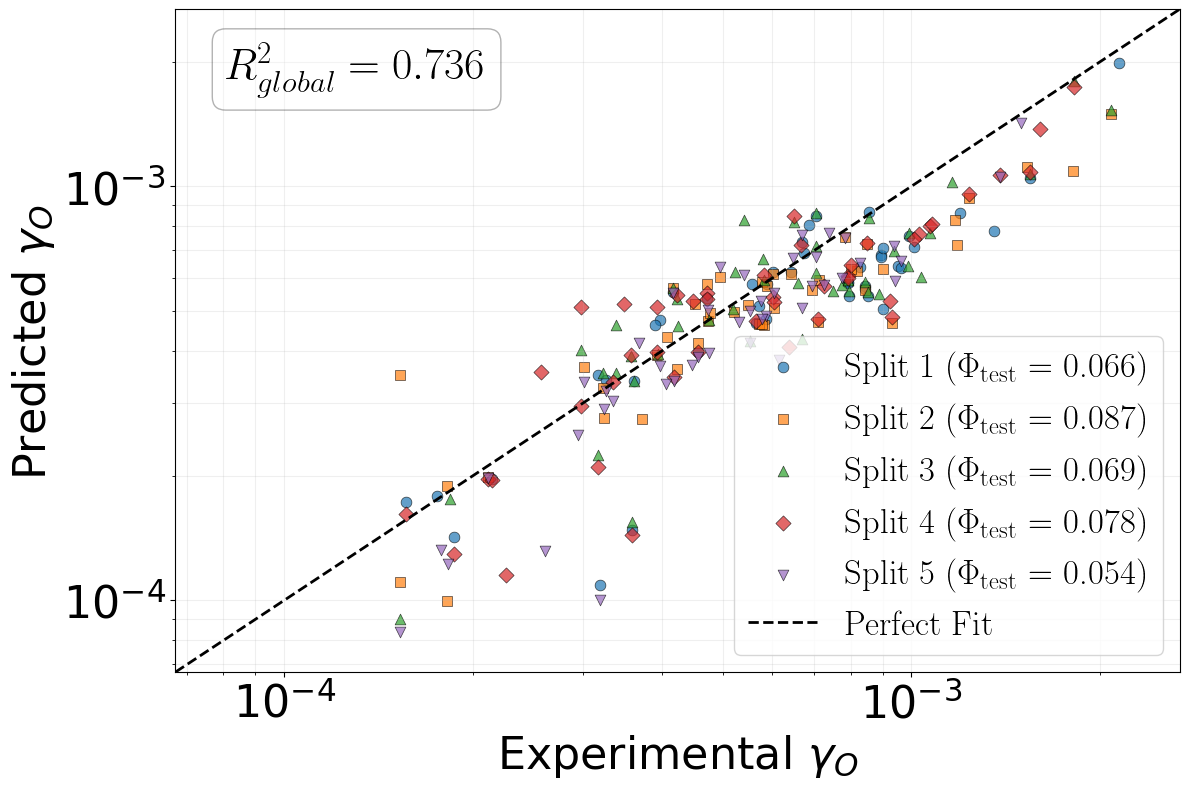

In [4]:


##* Parity Plot

from sklearn.metrics import r2_score, mean_squared_error


fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

markers = ['o', 's', '^', 'D', 'v'] 
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] # Standard visually distinct palette
    
all_exp = []
all_pred = []

log_scale = True

loss_vec = []
optimizer_vec = []


# Loop through the 5 Test Sets and Scatter Plot
for i in range(len(results_data)):
    
    exp_data, pred_data, loss, input_exp_data, optimizer, _ = results_data[i]
    # label = f'Split {i+1}: $\Phi$ = {round(loss_arr[i],3)}' 
    label = rf'Split {i+1} ($\Phi_{{\rm test}}$ = {round(loss, 3)})'
    
    loss_vec.append(loss)
    optimizer_vec.append(optimizer)
        
        # Accumulate data for global stats
    all_exp.extend(exp_data)
    all_pred.extend(pred_data)
        
        # Plot this set
    ax.scatter(exp_data, pred_data, 
            # c=colors[i % len(colors)], 
            marker=markers[i % len(markers)], 
            s=60,           # Size
            alpha=0.7,      # Transparency (helps if points overlap)
            edgecolors='k', # Black outline for contrast
            linewidth=0.5,
            label=label)

# Add the Perfect Agreement Line (y = x)
global_min = min(min(all_exp), min(all_pred))
global_max = max(max(all_exp), max(all_pred))

if log_scale:
    plot_min = global_min * 0.8
    plot_max = global_max * 1.25
    ax.set_xscale('log')
    ax.set_yscale('log')
else:
        buffer = (global_max - global_min) * 0.05
        plot_min = global_min - buffer
        plot_max = global_max + buffer

ax.plot([plot_min, plot_max], [plot_min, plot_max], 
            'k--', lw=2, label='Perfect Fit')

all_exp = np.array(all_exp)
all_pred = np.array(all_pred)

r2 = r2_score(all_exp, all_pred)

textstr = f'$R^2_{{global}} = {r2:.3f}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=32,
            verticalalignment='top', bbox=props)


plt.xlabel(r'Experimental $\gamma_O$', fontsize=32)
plt.ylabel(f'Predicted $\gamma_O$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.legend(fontsize=25, loc="lower right")

ax.set_xlim(plot_min, plot_max)
ax.set_ylim(plot_min, plot_max)
    
ax.grid(True, which="both", ls="-", alpha=0.2)
    
plt.tight_layout()
# plt.savefig("panel_parity_plot.png")

In [5]:

#### median plot

loss_arr = np.array(loss_vec)
print("loss: ", loss_arr)

median_value = np.median(loss_arr)
sorted_indices = np.argsort(loss_arr)
median_index = sorted_indices[len(loss_arr) // 2]

print(buffer_test_vec[median_index])
print(file_train_vec[median_index])


loss:  [0.06570707 0.08683445 0.06926171 0.07839086 0.05424713]
../Buffer_Data/Experimental_data_CO_O_merged_test2.hdf5
../study_opt_hierarchical/results/results_hier0_validation2.h5


In [6]:

exp_data, pred_data, loss_median, input_exp_data, optimizer_median, params_median = results_data[median_index]


params_default_paper = np.array([
                0.01634, 1.67e-4, 19.75, \
                1.0, 1.0, 1e-2, 1e-1, 1e-1, 1e-2, 1e-1, 1e-1, 1e-1, 1e-1, \
                1e-2, 1.0, 1.0, 1.0, 1e-1, 1e-1, 1.0, 1.0, 1.0, 1e-1, 1e-1, 1e-2, 1e-1, 1e-1, \
                2.9, 3400
                ])


params_default_paper_norm = (params_default_paper - lower_bounds) * np.reciprocal(upper_bounds - lower_bounds)
optimizer_def = optimizer_vec[median_index]

loss_def, gammas_sim_def = Phi_loss(params_default_paper_norm, optimizer_def)

print("loss_def: ", loss_def)


loss_def:  0.10623084412234596


In [7]:


fracCO_vec = []
Tnw_vec = []
current_vec = []
pressure_vec = []

for i in range(len(input_exp_data)):
    fracCO_vec.append(input_exp_data[i]['frac_CO2'])
    Tnw_vec.append(input_exp_data[i]['Tnw'])
    current_vec.append(input_exp_data[i]['current'])
    pressure_vec.append(input_exp_data[i]['pressure'])


fracCO_arr = np.array(fracCO_vec)
Tnw_arr = np.array(Tnw_vec)
current_arr = np.array(current_vec, dtype=int)
pressure_arr = np.array(pressure_vec)

exp_arr = np.array(exp_data)
pred_arr = np.array(pred_data)

In [8]:
print(pressure_arr)

[1.  1.  2.  3.  3.  1.5 5.  1.  1.  1.5 1.  1.  5.  7.5 1.5 2.  3.  3.
 5.  1.5 1.5 3.  0.4 0.6 5.  1.5 2.  0.4 1.  2.  1.  1.5 5.  1.5 0.4 0.8
 1.  7.5 1.5 5.  5.  0.4 1.  0.6 1. ]


[22 27 34 41]
[ 5  9 14 19 20 25 31 33 38]
[ 3  4 16 17 21]


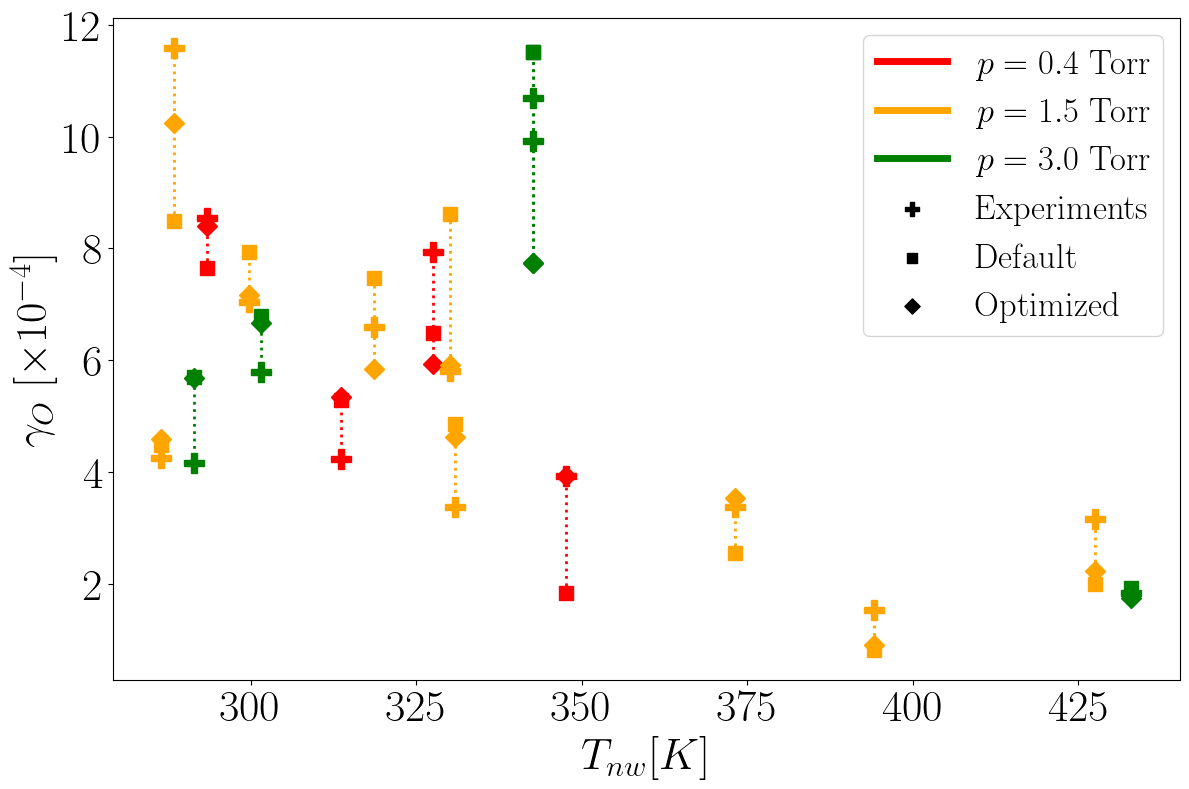

In [9]:

import pandas as pd

df = pd.DataFrame({'fracCO': fracCO_arr, 'current': current_arr, 'pressure': pressure_arr})
groups = df.groupby(['pressure']).indices

# pressures_select = [0.4, 0.6, 0.8, 3.0]
pressures_select = [0.4,  3.0, 1.5]

groups_mod = {key:val for key, val in  groups.items() if key in pressures_select}

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

colors_p = ['red', 'orange', 'green', 'blue', 'gray']


colors = [colors_p[i] for i in range(len(pressures_select))]

idx = 0
for key, val in groups_mod.items():
    
    print(val)
    
    ax.plot(Tnw_arr[val], exp_arr[val]*1e4, 'P', color=colors[idx], markersize=15)
    ax.plot(Tnw_arr[val], gammas_sim_def[val]*1e4, 's', color=colors[idx],  markersize=10)
    ax.plot(Tnw_arr[val], pred_arr[val]*1e4, 'D', color=colors[idx], markersize=10)
    
    # ax.plot(Tnw_arr[val], np.abs((gammas_sim_def[val]-exp_arr[val])/exp_arr[val]), 's', color=colors[idx], markersize=10)
    # ax.plot(Tnw_arr[val], np.abs((pred_arr[val]-exp_arr[val])/exp_arr[val]), 'D', color=colors[idx],  markersize=10)
    
    # ax.plot(current_arr[val], pred_arr[val]*1e4, '.', label=f"P = {key}")
    
    
    # --- PROPOSED ADDITION: Vertical Lines ---
    # 1. Get the 3 y-values for the current indices
    y1 = exp_arr[val]*1e4
    y2 = pred_arr[val]*1e4
    y3 = gammas_sim_def[val]*1e4
    
    # 2. Find min and max for each point
    # stack vertically: shape (3, N)
    stacked = np.vstack([y1, y2, y3])
    y_min = np.min(stacked, axis=0)
    y_max = np.max(stacked, axis=0)
    
    # 3. Get x coordinates
    x_curr = Tnw_arr[val]
    
    # 4. Plot vertical lines using vlines
    # colors[idx] ensures it matches the group color
    ax.vlines(x=x_curr, ymin=y_min, ymax=y_max, colors=colors[idx], linewidth=2, linestyles='dotted')
    
    idx += 1


idx = 0
for key, val in groups_mod.items():
    
    ax.plot([], [], label=f"$p = {key} $ Torr", color=colors[idx], linewidth=5.0)
    idx += 1
    
ax.scatter([], [], marker='P', label=f"Experiments", color='black',s=100)
ax.scatter([], [], marker='s', label=f"Default", color='black', s=60)
ax.scatter([], [], marker='D', label=f"Optimized", color='black', s=60)



plt.ylabel(r'$\gamma_O$ $[\times 10^{-4}]$', fontsize=32)
plt.xlabel(r'$T_{nw} [K]$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.legend(fontsize=25)
plt.tight_layout()
# plt.savefig("panel_final_results.png")



In [10]:


### hessian plot

def grads_wise_numeric(params, opt_object, hstep = 1e-5):
    params_arr = np.array(params)
    _, residual, _ ,_, _, _ = opt_object.objective_function_diff_full(params_arr)
    
    residuals = []
    for i in range(len(params)):
        step_vec = np.zeros_like(params_arr)
        step_vec[i] = hstep
        _, residual_plus, _ ,_, _, _ = opt_object.objective_function_diff_full(params_arr + step_vec)
        grad = (residual_plus-residual)/hstep
        residuals.append(grad)
        
        print("i grad:: ", i, "-", len(params), "grad: ", np.mean(np.abs(grad)))
    
    return np.array(residuals).T

def create_subspaces_num(params, percent_info, opt_object, eps = 1e-8, reg = 1e-6, tau=1e-4):
    
    grad_errors = grads_wise_numeric(params, opt_object)
    # norms = np.linalg.norm(grad_errors, axis=1, keepdims=True) + eps
    # G = grad_errors / norms  
    G = grad_errors                                   
    F = G.T @ G                                                 
    F_reg = F + reg * np.eye(F.shape[0], dtype=F.dtype)
    
    eigvals, eigvecs = np.linalg.eigh(F_reg)                    

    idx = np.argsort(eigvals)[::-1]
    eigvals_sorted = eigvals[idx]
    eigvecs_sorted = eigvecs[:, idx]
    
    print("eigen_vals_sorted: ", eigvals_sorted)
    
    total_mass = eigvals_sorted.sum()
    cumulative  = np.cumsum(eigvals_sorted)
    ks = int(np.sum(cumulative < percent_info * total_mass)) + 1
    Vs = eigvecs_sorted[:, :ks]
    
    if ks < len(eigvals_sorted):
        ratios = eigvals_sorted[ks:] / eigvals_sorted[ks]
        kl = int(np.count_nonzero(ratios >= tau))
    else:
        kl = 0
    Vl = eigvecs_sorted[:, ks:ks+kl]

    return {
        'phi0': params,
        'dims': len(eigvals_sorted),
        'V_dims': (ks, kl),
        'Vs': Vs,
        'Vl': Vl,
        'eigvals_sorted': eigvals_sorted,
        'eigvecs_sorted': eigvecs_sorted
    }




file_train_mediator = "../Buffer_Data/Experimental_data_CO_O_merged_train2.hdf5"
buffer_test_mediator = "../Buffer_Data/Experimental_data_CO_O_merged_test2.hdf5"

optimizer_median_hess = run_hier_set(file_train_mediator)

percent_info = 0.9
dict_space = create_subspaces_num(params_median, percent_info, optimizer_median_hess)





Data Buffer:  /Users/joseafonso/Desktop/PlasmaDM/Buffer_Data/../Buffer_Data/Experimental_data_CO_O_merged_train2.hdf5
  d[CO2_F]/dt = -CO2_F*r_29 + r_28*(-CO2_F - CO_F - O2_F - O_F + 1.0)
  d[CO_F]/dt = -CO_F*O_F*r_35 - 0.02*CO_F*O_S*r_40 - 0.02*CO_F*Odb_S*r_61 - 0.02*CO_F*Vdb_S*r_60 - CO_F*r_31 - CO_F*r_33 - 0.02*CO_F*r_36*(-CO_S - COdb_S - O_S - Odb_S - Vdb_S + 1.0) + r_30*(-CO2_F - CO_F - O2_F - O_F + 1.0)
  d[CO_S]/dt = CO_F*r_36*(-CO_S - COdb_S - O_S - Odb_S - Vdb_S + 1.0) - CO_S*O_F*r_39 - CO_S*r_37 - CO_S*r_43 - CO_S*r_44 - CO_S*r_45 - CO_S*r_46 + r_32*(-CO_S - COdb_S - O_S - Odb_S - Vdb_S + 1.0)
  d[COdb_S]/dt = CO_F*Vdb_S*r_60 - COdb_S*O_F*r_62 - COdb_S*r_54 - COdb_S*r_55 - COdb_S*r_56 - COdb_S*r_57 - COdb_S*r_59 + Vdb_S*r_49
  d[O2_F]/dt = -O2_F*O_F*r_15 - O2_F*r_10 - O2_F*r_12 - O2_F*r_14 + r_9*(-CO2_F - CO_F - O2_F - O_F + 1.0)
  d[O_F]/dt = -CO_F*O_F*r_35 - 0.02*CO_S*O_F*r_39 - 0.02*COdb_S*O_F*r_62 - O2_F*O_F*r_15 - 2*O_F**2*r_8 - 0.02*O_F*O_S*r_7 - 0.02*O_F*Odb_S*r_27 - 0

In [11]:

best_params_unnorm = lower_bounds + (upper_bounds - lower_bounds) * params_median

eig_val = dict_space['eigvals_sorted']
eig_vec = dict_space['eigvecs_sorted']

hessian = eig_val[None, :] * eig_vec[:,:] @ eig_vec[:,:].T
hessian_inv = np.reciprocal(eig_val[None, :]) * eig_vec[:,:] @ eig_vec[:,:].T

delta_theta_norm = np.sqrt(2.0 * 0.01 * loss_median * np.diag(hessian_inv))
delta_theta_unnorm = lower_bounds + (upper_bounds - lower_bounds) * delta_theta_norm


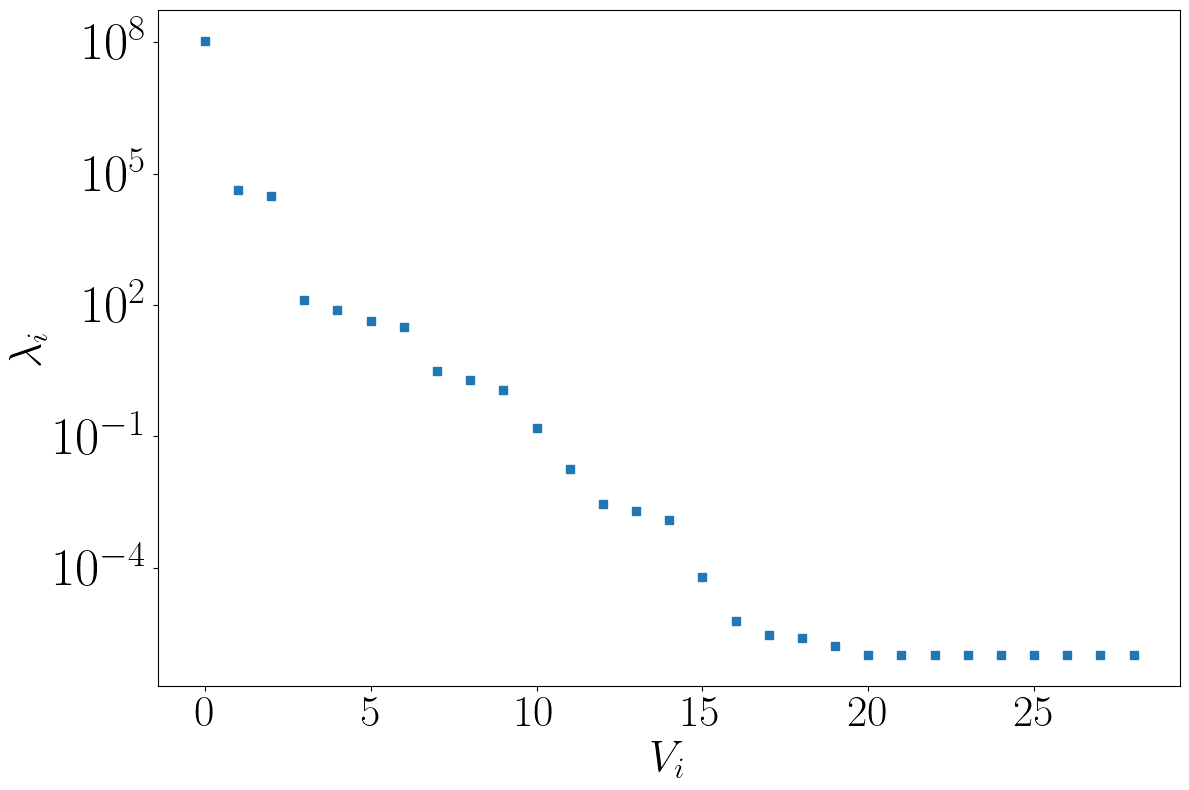

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
ax.plot(eig_val, 's', linewidth=3)
plt.yscale('log')
plt.xlabel(r'$V_i$', fontsize=32)
plt.ylabel(r'$\lambda_i$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=38)
plt.tight_layout()

# plt.savefig("panel_EigenVals_v2.png")

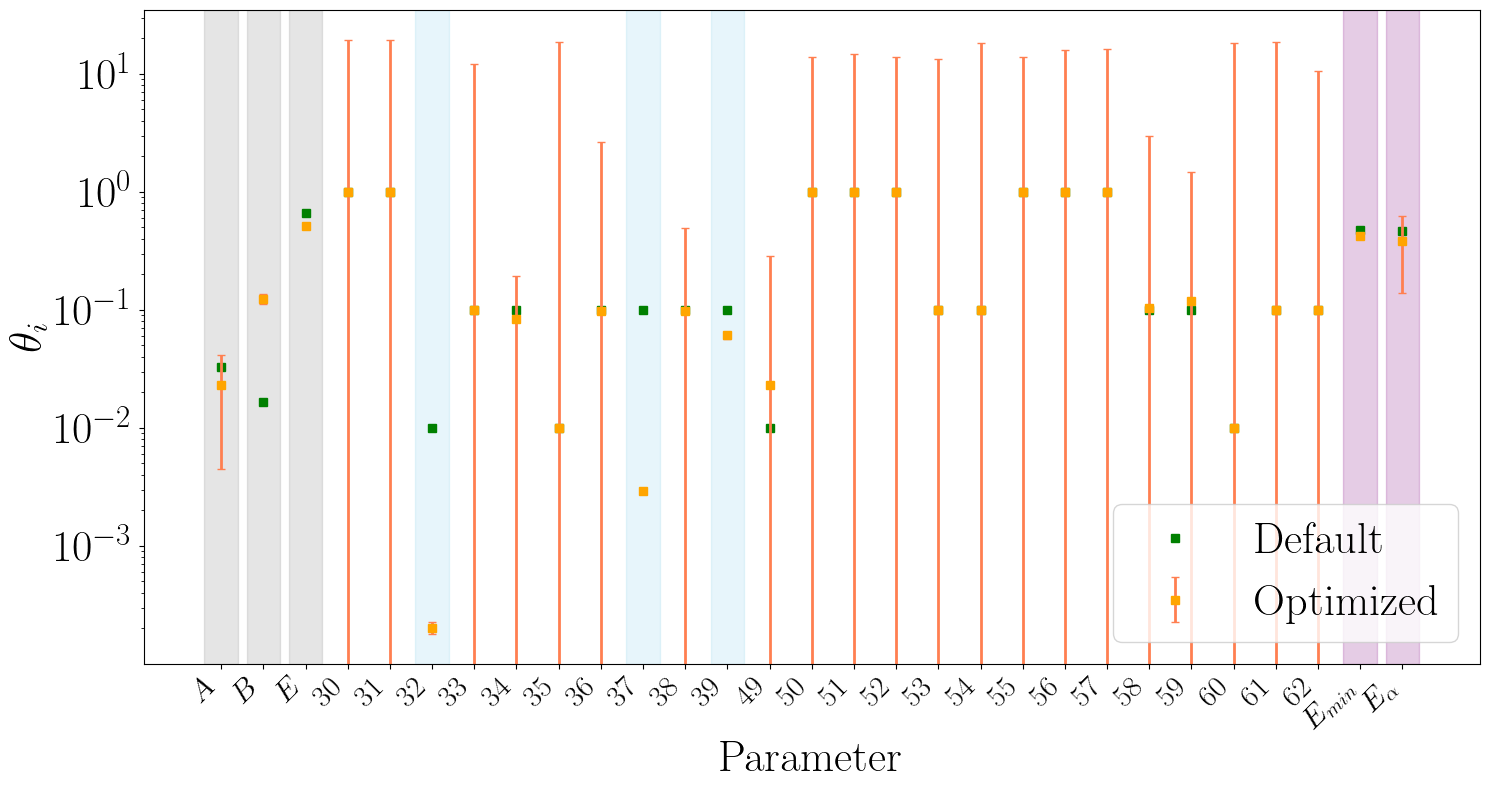

In [13]:
# plt.plot(iter_x, best_params, "x")


tick_labels = [r"$A$", r"$B$", r"$E$"] + \
    [r"$30$", r"$31$", r"$32$", r"$33$", r"$34$", r"$35$", r"$36$", r"$37$", r"$38$", r"$39$"] + \
    [r"$49$", r"$50$", r"$51$", r"$52$", r"$53$", r"$54$", r"$55$", r"$56$", r"$57$", r"$58$", r"$59$", r"$60$", r"$61$", r"$62$"] + \
    [r"$E_{min}$", r"$E_{\alpha}$"]


iter_x = np.arange(len(params_default_paper_norm))

color_exp = "blue"
color_paper = "green"
color_opt = "orange"

params_default_paper_norm = (params_default_paper - lower_bounds) * np.reciprocal(upper_bounds - lower_bounds)

fig, ax = plt.subplots(figsize=(15, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.plot(iter_x, params_default_paper_norm, "s", linewidth=3, label="Default", color=color_paper)
plt.errorbar(iter_x, params_median, yerr=delta_theta_norm/2, fmt='s',
             ecolor='coral', elinewidth=2, capsize=3,
             label='Optimized', color=color_opt)


colors=["grey", "skyblue", "purple"]

### 1
bar_center_x = [0.0, 1.0, 2.0] 
bar_width = 0.8     
for i in range(len(bar_center_x)):
    xmin = bar_center_x[i] - bar_width / 2
    xmax = bar_center_x[i] + bar_width / 2
    ax.axvspan(
        xmin,
        xmax,
        color=colors[0],      
        alpha=0.2,       
    )

### 2
bar_center_x = [5.0, 10.0, 12.0] 
bar_width = 0.8     
for i in range(len(bar_center_x)):
    xmin = bar_center_x[i] - bar_width / 2
    xmax = bar_center_x[i] + bar_width / 2
    ax.axvspan(
        xmin,
        xmax,
        color=colors[1],      
        alpha=0.2,       
    )


### 2
bar_center_x = [27.0, 28.0] 
bar_width = 0.8     
for i in range(len(bar_center_x)):
    xmin = bar_center_x[i] - bar_width / 2
    xmax = bar_center_x[i] + bar_width / 2
    ax.axvspan(
        xmin,
        xmax,
        color=colors[2],      
        alpha=0.2,       
    )


plt.yscale('log')
plt.xlabel(r'Parameter', fontsize=32)
plt.ylabel(r'$\theta_i$', fontsize=32)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=32)

plt.xticks(ticks=iter_x.squeeze(), labels=tick_labels, rotation=45, ha='right')
plt.tight_layout() 

# plt.savefig("Params_comparison_median_result.png")


In [14]:

###! parameters table

params_median_unnorm = lower_bounds + (upper_bounds - lower_bounds) * params_median

list1 = [0, 1, 2]
print(params_median_unnorm[list1])
list2 = [5, 10, 12]
print(params_median_unnorm[list2])
list3 = [27, 28]
print(params_median_unnorm[list3])

[1.15760599e-02 1.24510571e-03 1.52744762e+01]
[0.000213   0.00292101 0.06091858]
[2.68991175e+00 3.14382029e+03]
